In [1]:
import numpy as np
from numpy import random as rand
import matplotlib.pyplot as plt
from tqdm import trange
from OptSegSI import optSegSI

import ruptures as rpt
from scipy.stats import ttest_ind

In [2]:
K = 1
eps = 1
cps = [8, 20]
num = 100
N_values = [10, 50, 100]
p_values = np.empty((len(N_values),K, num))

for i,N in enumerate(N_values):
    Sigma = eps**2 * np.identity(N)
    mu = np.zeros(N)
    white_noise = mu[None,:] + eps * rand.randn(num, len(mu))
    #white_noise  = eps * rand.randn(num, len(mu))
    for j in trange(num):
        p_values[i, :, j] = np.exp(optSegSI(white_noise[j], N, K, Sigma, pruning=False))

100%|██████████| 100/100 [04:02<00:00,  2.43s/it]


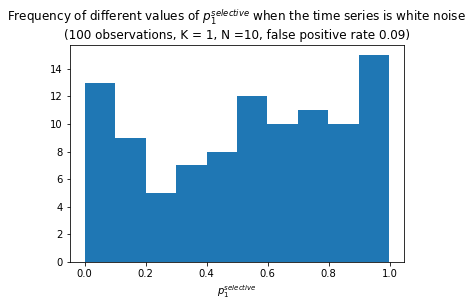

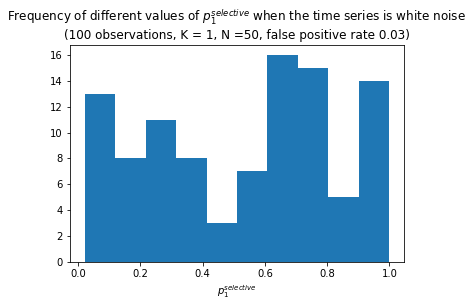

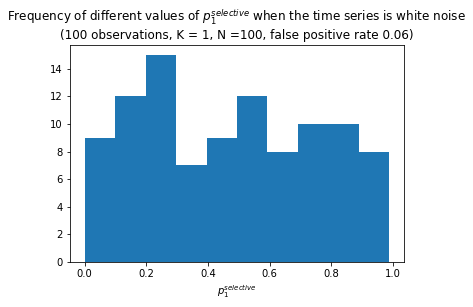

<Figure size 432x288 with 0 Axes>

In [3]:
alpha = 0.05
for i, N in enumerate(N_values):
    plt.hist(p_values[i,0])
    plt.xlabel(r"$p_1^{selective}$")
    title = r"Frequency of different values of $p_1^{selective}$ when the time series is white noise "
    plt.title(title + f"\n({num} observations, K = {K}, N ={N}, false positive rate {(p_values[i,0]<alpha).sum()/num})")
    plt.savefig(f"plots/p_distribution_N_{N}.png", bbox_inches = "tight")
    plt.show()
    plt.clf()

# Comparison with T-test

In [4]:
def fig_ax(nrows=1, figsize=(15, 3)):
    return plt.subplots(nrows=nrows, figsize=(figsize[0], figsize[1] * nrows))

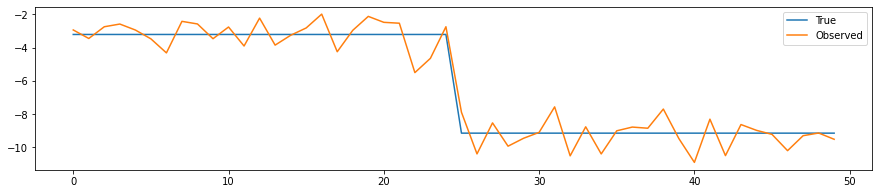

In [5]:
n_samples = 50
n_bkps = 1
n_dims = 1
sigma_noise = 1
signal, bkps = rpt.pw_constant(
    n_samples=n_samples, n_features=n_dims, n_bkps=n_bkps, noise_std=0
)
signal_with_noise = signal + np.random.normal(
    scale=sigma_noise, size=signal.shape
)

fig, ax = fig_ax()
ax.plot(signal, label="True")
ax.plot(signal_with_noise, label="Observed")
_ = plt.legend()
    

In [6]:
estimated_sigma = np.std(signal_with_noise[:50])
estimated_Sigma = estimated_sigma**2* np.identity(n_samples)

In [7]:
log_p_values, detected_change_points = optSegSI(signal_with_noise.flatten(), n_samples, n_bkps, estimated_Sigma, verbose=False, with_tau_det=True)
print(f"Changepoint detected at time {detected_change_points[1]}")
print(f"p_value of {np.exp(log_p_values[0])} obtained with selective inference")
ttest = ttest_ind(
    signal_with_noise[:detected_change_points[1]],
    signal_with_noise[detected_change_points[1]:],
)
print(f"p_value of {ttest.pvalue[0]} obtained with naive t-test")

Changepoint detected at time 24
p_value of 5.986127120936236e-11 obtained with selective inference
p_value of 5.0878564805117475e-21 obtained with naive t-test
